Mental Health in Tech: People working in tech are often at their desks for extended amounts of time. Explore how this trend correlates with mental health. Examine the data coollected through surveys search for trends. Find out if there is a link between mental health and companies that offer wellness programs. What do the results show you about the state of mental health in tech? Can you suggest steps that companies can take to help their employees?

MAIN QUESTIONS

1.Does remote work affect an individual's mental health more compared to someone who works on site?(self employed VS work in organisation ) (Jane)

2.Do males seek mental health treatments less often than females in tech companies? (Loku)

3.Is mental health more prevalent in different regions?(US) Does US have a bigger issue with mental health compared to other countries?(Keegan)

4.Does mental health interfere with work? (Lishi )(more grouping - split by company size, family history, males/females)


Checking to see how US seeks treatment compared to other regions.

Overall, More than half of the data suggests that US has more problems with mental and US is more likely to seek treakment.


In [1]:
###Using New Csv file now 2016 CSV file 

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = Path('files/mental_heath_2016.csv')  # Replace 'your_file_name.csv' with the actual file name

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Display the DataFrame
data_df.head()

#print(data_df.columns.tolist())  # This will print a list of the column names

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
#rename coloumns then put into new DF

# Display the original DataFrame
#print("Original DataFrame:")
#print(data_df.head())
#data_df.head()

location_df = data_df.copy()  # Create a copy of the modified DataFrame, so it does not affect original file.


# Rename the columns
location_df.rename(columns={
    'Are you self-employed?': 'Self-Employed?',
    'How many employees does your company or organization have?': 'Number of Employees',
    'What country do you live in?': 'Location',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'Diagnosed by professional?',
    'Do you currently have a mental health disorder?':'Current mental disorder',
    'If yes, what condition(s) have you been diagnosed with?':'Diagnosis',
    'Have you ever sought treatment for a mental health issue from a mental health professional?':'Seek treatment?',
    'What is your age?':'Age'
    # Add more columns if needed
}, inplace=True)

#0 = No
#1 = Yes
#need to change these answers

#Columns to only include in DF
location_df = location_df[['Self-Employed?', 'Seek treatment?', 'Location','Number of Employees','Diagnosed by professional?'
                            ,'Current mental disorder','Diagnosis','Age']]

# Display the DataFrame with renamed columns
print("DataFrame with Renamed Columns:")
location_df.head()

DataFrame with Renamed Columns:


,Self-Employed?,Seek treatment?,Location,Number of Employees,Diagnosed by professional?,Current mental disorder,Diagnosis,Age
0,0,0,United Kingdom,26-100,Yes,No,NaN,39
1,0,1,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",29
2,0,1,United Kingdom,6-25,No,No,NaN,38
3,1,1,United Kingdom,NaN,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43
4,0,1,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43


In [4]:
print("\nNew Column Names:")
print(location_df.columns.tolist())


New Column Names:
['Self-Employed?', 'Seek treatment?', 'Location', 'Number of Employees', 'Diagnosed by professional?', 'Current mental disorder', 'Diagnosis', 'Age']


In [5]:
#data_df

In [6]:
# Check for NaN values in the DataFrame
na_counts = location_df.isna().sum()

# Display the count of NaN values for each column
print("Count of NaN values in each column:")
print(na_counts)

# Check if there are any NaN values in the DataFrame
has_na = location_df.isna().any().any()

if has_na:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")


Count of NaN values in each column:
Self-Employed?                  0
Seek treatment?                 0
Location                        0
Number of Employees           287
Diagnosed by professional?      0
Current mental disorder         0
Diagnosis                     865
Age                             0
dtype: int64
There are NaN values in the DataFrame.


In [7]:
#change 0 and 1 values to be yes or no coloumn
location_df["Self-Employed?"] = location_df["Self-Employed?"].replace({0: "No", 1: "Yes"})
location_df["Seek treatment?"] = location_df["Seek treatment?"].replace({0: "No", 1: "Yes"})

location_df

,Self-Employed?,Seek treatment?,Location,Number of Employees,Diagnosed by professional?,Current mental disorder,Diagnosis,Age
0,No,No,United Kingdom,26-100,Yes,No,NaN,39
1,No,Yes,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",29
2,No,Yes,United Kingdom,6-25,No,No,NaN,38
3,Yes,Yes,United Kingdom,NaN,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43
4,No,Yes,United States of America,6-25,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",43
...,...,...,...,...,...,...,...,...
1428,Yes,Yes,United States of America,NaN,No,No,NaN,34
1429,Yes,No,United States of America,NaN,Yes,No,NaN,56
1430,No,Yes,United States of America,100-500,Yes,Maybe,NaN,52
1431,No,No,United States of America,100-500,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",30


In [8]:
#Keegan Code here

#checking for US VS Outside Seeking treatment and not seeking treatment

#filter data for countries
us_data = location_df[location_df['Location'] == 'United States of America']
other_countries_data = location_df[location_df['Location'] != 'United States of America']

# Analyze the Data
# 'treatment' column to see how many people sought treatment
us_treatment_count = us_data['Seek treatment?'].value_counts()  # Remove normalize=True
other_countries_treatment_count = other_countries_data['Seek treatment?'].value_counts()  # Remove normalize=True

# Filter to only include results where treatment = 'Yes'
us_treatment_yes = us_treatment_count.get('Yes', 0)  # Get the count for 'Yes', default to 0 if not found
other_countries_treatment_yes = other_countries_treatment_count.get('Yes', 0)  # Same for other countries

# Filter to only include results where treatment = 'No'
us_treatment_no = us_treatment_count.get('No', 0)  # Get the count for 'No', default to 0 if not found
other_countries_treatment_no = other_countries_treatment_count.get('No', 0)  # Same for other countries

# NO treatment DataFrame for comparison
country_comparison_no_df = pd.DataFrame({
    'US': [us_treatment_no],
    'Other Countries': [other_countries_treatment_no]
})

# Yes treatment DataFrame for comparison for getting treatment
country_comparison_yes_df = pd.DataFrame({
    'US': [us_treatment_yes],
    'Other Countries': [other_countries_treatment_yes]
})

print("Yes for treatment")
print(country_comparison_yes_df)
#country_comparison_df

print("No for treatment")
print(country_comparison_no_df)
#country_comparison_no_df

Yes for treatment
    US  Other Countries
0  550              289
No for treatment
    US  Other Countries
0  290              304


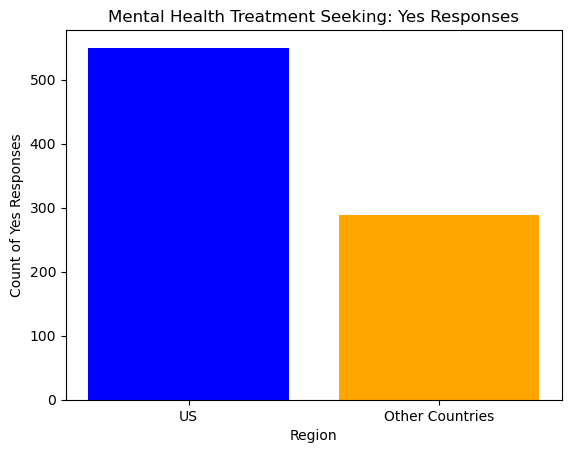

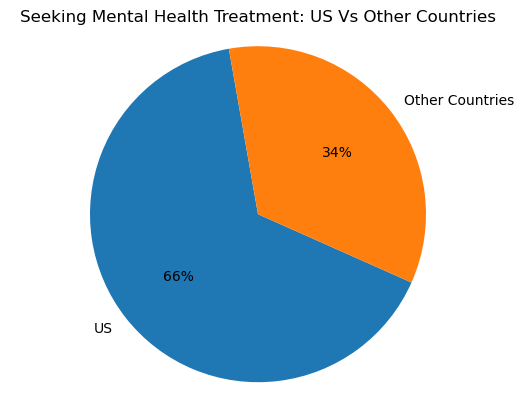

In [9]:
# Data for plotting Yes to treatment
labels = ['US', 'Other Countries']
values = [us_treatment_yes, other_countries_treatment_yes]  # Use the 'Yes' counts

# Create a bar graph
plt.bar(labels, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Mental Health Treatment Seeking: Yes Responses')  # Title for Yes responses
plt.xlabel('Region')
plt.ylabel('Count of Yes Responses')  # Y-axis label for Yes responses

# Show the graph
plt.show()

# Data for plotting
sizes = [us_treatment_yes, other_countries_treatment_yes]  # Use the 'Yes' counts

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=100)  # Display whole numbers for percentages
plt.title('Seeking Mental Health Treatment: US Vs Other Countries')  # Title for Yes responses
plt.axis('equal')

# Show the chart
plt.show()

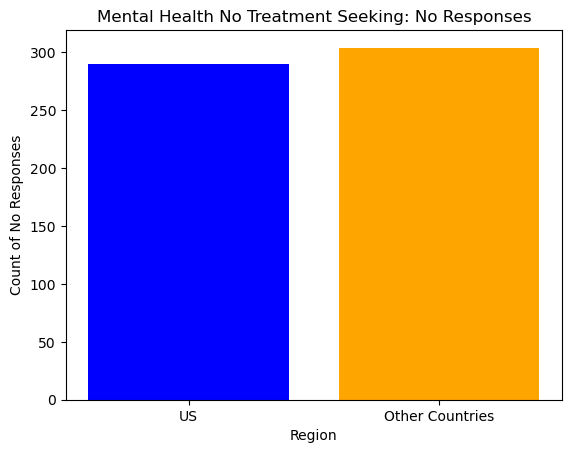

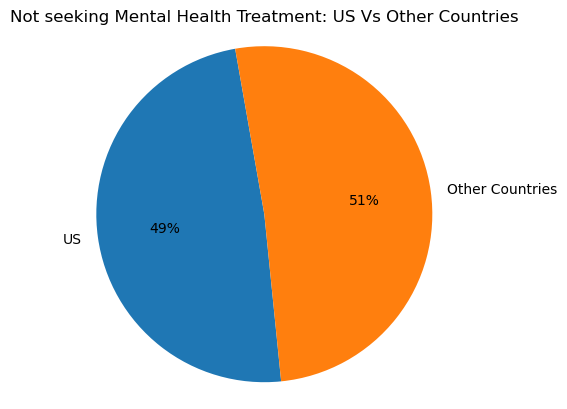

In [10]:
# Data for plotting No seek help
labels = ['US', 'Other Countries']
values = [us_treatment_no, other_countries_treatment_no]  # Use the 'No' counts

# Create a bar graph
plt.bar(labels, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Mental Health No Treatment Seeking: No Responses')  # Title for Yes responses
plt.xlabel('Region')
plt.ylabel('Count of No Responses')  # Y-axis label for Yes responses

# Show the graph
plt.show()

# Data for plotting
sizes = [us_treatment_no, other_countries_treatment_no]  # Use the 'Yes' counts

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=100)  # Display whole numbers for percentages
plt.title('Not seeking Mental Health Treatment: US Vs Other Countries')  # Title for Yes responses
plt.axis('equal')

# Show the chart
plt.show()

In [11]:
usa_diagnosed_data = us_data[(us_data['Location'] == 'United States of America') & 
                         (us_data['Diagnosed by professional?'] == 'Yes')]

other_diagnosed_data = other_countries_data[(other_countries_data['Location'] != 'United States of America') & 
                         (other_countries_data['Diagnosed by professional?'] == 'Yes')]

#other_countries_data = location_df[location_df['Location'] != 'United States of America']



In [12]:
usa_diagnosed_count = len(usa_diagnosed_data)  # Count of diagnosed cases in the USA
other_diagnosed_count = len(other_diagnosed_data)  # Count for other countries

# Create a DataFrame
yes_diagnosed_df = pd.DataFrame({
    'Location': ['United States', 'Other Countries'],
    'Diagnosed Cases': [usa_diagnosed_count, other_diagnosed_count]
})

# Display the DataFrame for visualization
#print(USA_treatment_df)
yes_diagnosed_df

,Location,Diagnosed Cases
0,United States,473
1,Other Countries,243


In [13]:
no_usa_diagnosed_data = us_data[(us_data['Location'] == 'United States of America') & 
                         (us_data['Diagnosed by professional?'] == 'No')]

no_other_diagnosed_data = other_countries_data[(other_countries_data['Location'] != 'United States of America') & 
                         (other_countries_data['Diagnosed by professional?'] == 'No')]

#other_countries_data = location_df[location_df['Location'] != 'United States of America']

# Count of diagnosed cases with 'No' in the USA and other countries
no_usa_diagnosed_count = len(no_usa_diagnosed_data)  # Count of diagnosed cases in the USA
no_other_diagnosed_count = len(no_other_diagnosed_data)  # Count for other countries

# Create a DataFrame for visualization
no_diagnosed_df = pd.DataFrame({
    'Location': ['United States', 'Other Countries'],
    'Not Diagnosed Cases': [no_usa_diagnosed_count, no_other_diagnosed_count]
})

# Display the DataFrame for visualization
#print(no_diagnosed_df)
no_diagnosed_df

,Location,Not Diagnosed Cases
0,United States,367
1,Other Countries,350


In [26]:
#Check for common diagnosis in every location

diagnosis_location_df = location_df[['Location','Diagnosis','Age','Diagnosed by professional?']].copy()
diagnosis_location_df

,Location,Diagnosis,Age,Diagnosed by professional?
0,United Kingdom,NaN,39,Yes
1,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",29,Yes
2,United Kingdom,NaN,38,No
3,United Kingdom,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes
4,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes
...,...,...,...,...
1428,United States of America,NaN,34,No
1429,United States of America,NaN,56,Yes
1430,United States of America,NaN,52,Yes
1431,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",30,Yes


In [15]:
# Create a copy of the DataFrame
diagnosis_location_df = diagnosis_location_df.copy()

# Drop rows with NaN values in 'Diagnosis' column
diagnosis_location_df.dropna(subset=['Diagnosis'], inplace=True)

# Display the cleaned DataFrame
#print(diagnosis_location_df_copy)
diagnosis_location_df

,Location,Diagnosis,Age,Diagnosed by professional?
1,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",29,Yes
3,United Kingdom,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes
4,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",43,Yes
5,United Kingdom,"Anxiety Disorder (Generalized, Social, Phobia,...",42,No
7,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",37,Yes
...,...,...,...,...
1424,Canada,"Anxiety Disorder (Generalized, Social, Phobia,...",22,Yes
1426,Canada,Attention Deficit Hyperactivity Disorder,26,Yes
1427,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",38,Yes
1431,United States of America,"Anxiety Disorder (Generalized, Social, Phobia,...",30,Yes


In [16]:
#unique_diagnoses = diagnosis_location_df['Diagnosis'].unique()
#print(unique_diagnoses)

Primary_Diagnosis
Anxiety Disorder (Generalized, Social, Phobia, etc)         306
Mood Disorder (Depression, Bipolar Disorder, etc)           146
Attention Deficit Hyperactivity Disorder                     23
Post-traumatic Stress Disorder                                8
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)      6
Name: count, dtype: int64


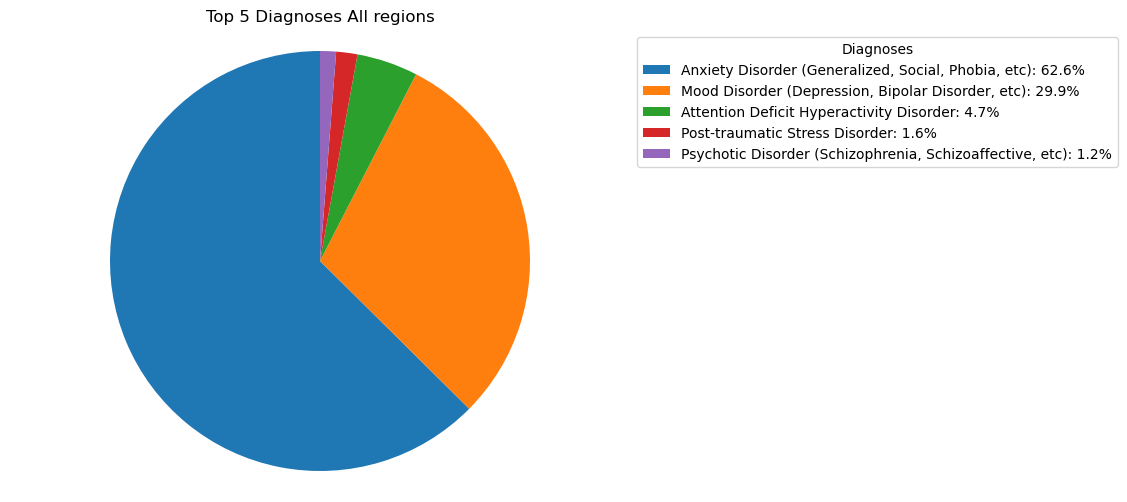

In [17]:
#check how many have been diagnosed by professional
filtered_diagnois_df = diagnosis_location_df[diagnosis_location_df['Diagnosed by professional?'] == 'Yes'].copy()

# Split the Diagnosis column and get the first part, so we don't get the extra text.
filtered_diagnois_df['Primary_Diagnosis'] = filtered_diagnois_df['Diagnosis'].str.split('|').str[0]

# Get unique primary diagnoses
unique_primary_diagnoses = filtered_diagnois_df['Primary_Diagnosis'].unique()
#print(unique_primary_diagnoses)

# Count the occurrences of each unique primary diagnosis
diagnosis_counts = filtered_diagnois_df['Primary_Diagnosis'].value_counts().head()#print only top 5 

# Print the counts
print(diagnosis_counts)

# Renaming diagnosis_counts to top 5 diagnoses
top_5_diagnosis = diagnosis_counts

# Calculate percentages
percentages = (top_5_diagnosis / top_5_diagnosis.sum()) * 100
labels = [f"{name}: {percent:.1f}%" for name, percent in zip(top_5_diagnosis.index, percentages)]

# Create a pie chart without percentages
plt.figure(figsize=(8, 6))
plt.pie(top_5_diagnosis, startangle=90)
plt.title('Top 5 Diagnoses All regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a custom legend on the right side of the pie chart
plt.legend(labels, title="Diagnoses", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [18]:
#check how many have been diagnosed by professional & in USA


Primary_Diagnosis
Anxiety Disorder (Generalized, Social, Phobia, etc)         211
Mood Disorder (Depression, Bipolar Disorder, etc)           109
Attention Deficit Hyperactivity Disorder                     17
Post-traumatic Stress Disorder                                6
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)      3
Name: count, dtype: int64


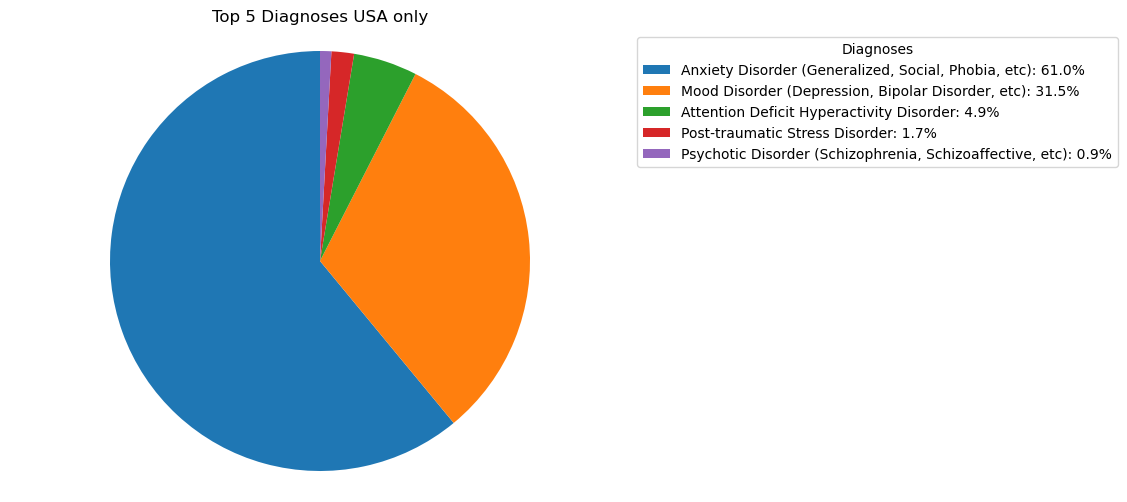

In [19]:
#check how many have been diagnosed by professional & in USA
USA_diagnois_df = diagnosis_location_df[(diagnosis_location_df['Location'] == 'United States of America') & 
                         (diagnosis_location_df['Diagnosed by professional?'] == 'Yes')].copy()

# Split the Diagnosis column and get the first part
USA_diagnois_df['Primary_Diagnosis'] = USA_diagnois_df['Diagnosis'].str.split('|').str[0]

# Get unique primary diagnoses
USA_unique_primary_diagnoses = USA_diagnois_df['Primary_Diagnosis'].unique()
#print(USA_unique_primary_diagnoses)

# Count the occurrences of each unique primary diagnosis
USA_diagnosis_counts = USA_diagnois_df['Primary_Diagnosis'].value_counts().head()  # Print only top 5

# Print the counts
print(USA_diagnosis_counts)

# Calculate percentages
percentages = (USA_diagnosis_counts / USA_diagnosis_counts.sum()) * 100
labels = [f"{name}: {percent:.1f}%" for name, percent in zip(USA_diagnosis_counts.index, percentages)]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(USA_diagnosis_counts, startangle=90)
plt.title('Top 5 Diagnoses USA only')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a custom legend on the right side of the pie chart
plt.legend(labels, title="Diagnoses", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Primary_Diagnosis
Anxiety Disorder (Generalized, Social, Phobia, etc)         95
Mood Disorder (Depression, Bipolar Disorder, etc)           37
Attention Deficit Hyperactivity Disorder                     6
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)     3
Post-traumatic Stress Disorder                               2
Name: count, dtype: int64


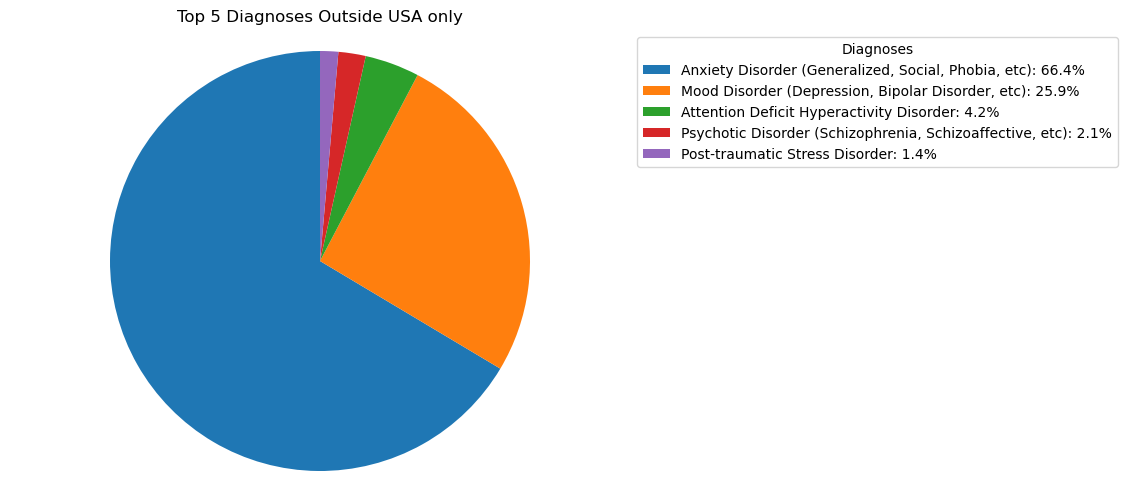

In [20]:
#check how many have been diagnosed by professional & Outside USA
Outside_USA_diagnois_df = diagnosis_location_df[(diagnosis_location_df['Location'] != 'United States of America') & 
                         (diagnosis_location_df['Diagnosed by professional?'] == 'Yes')].copy()

# Split the Diagnosis column and get the first part
Outside_USA_diagnois_df['Primary_Diagnosis'] = Outside_USA_diagnois_df['Diagnosis'].str.split('|').str[0]

# Get unique primary diagnoses
unique_Outside_USA_primary_diagnoses = Outside_USA_diagnois_df['Primary_Diagnosis'].unique()
#print(USA_unique_primary_diagnoses)

# Count the occurrences of each unique primary diagnosis
Outside_USA_diagnosis_counts = Outside_USA_diagnois_df['Primary_Diagnosis'].value_counts().head()  # Print only top 5

# Print the counts
print(Outside_USA_diagnosis_counts)

# Calculate percentages
percentages = (Outside_USA_diagnosis_counts / Outside_USA_diagnosis_counts.sum()) * 100
labels = [f"{name}: {percent:.1f}%" for name, percent in zip(Outside_USA_diagnosis_counts.index, percentages)]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(Outside_USA_diagnosis_counts, startangle=90)
plt.title('Top 5 Diagnoses Outside USA only')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a custom legend on the right side of the pie chart
plt.legend(labels, title="Diagnoses", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

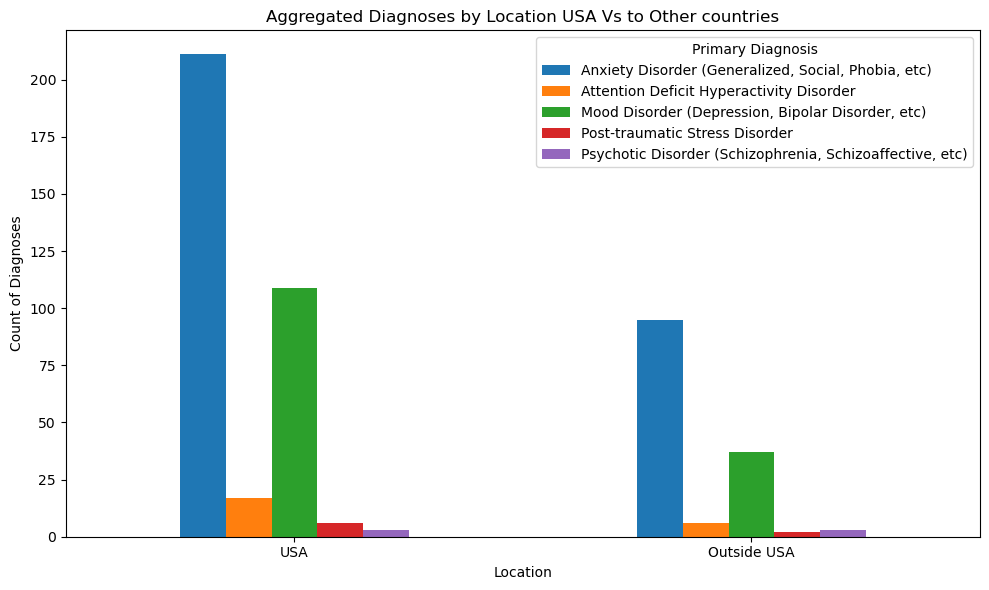

In [21]:
# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'USA': USA_diagnosis_counts,
    'Outside USA': Outside_USA_diagnosis_counts
})

#combined_counts.T
# Transpose the DataFrame to have locations on the x-axis
#swap x and Y locations because locations was showing as legend by default and
#wanted it the other way arount
combined_counts = combined_counts.T

# Plotting No stack
combined_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Aggregated Diagnoses by Location USA Vs to Other countries')
plt.xlabel('Location')
plt.ylabel('Count of Diagnoses')
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend(title='Primary Diagnosis')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

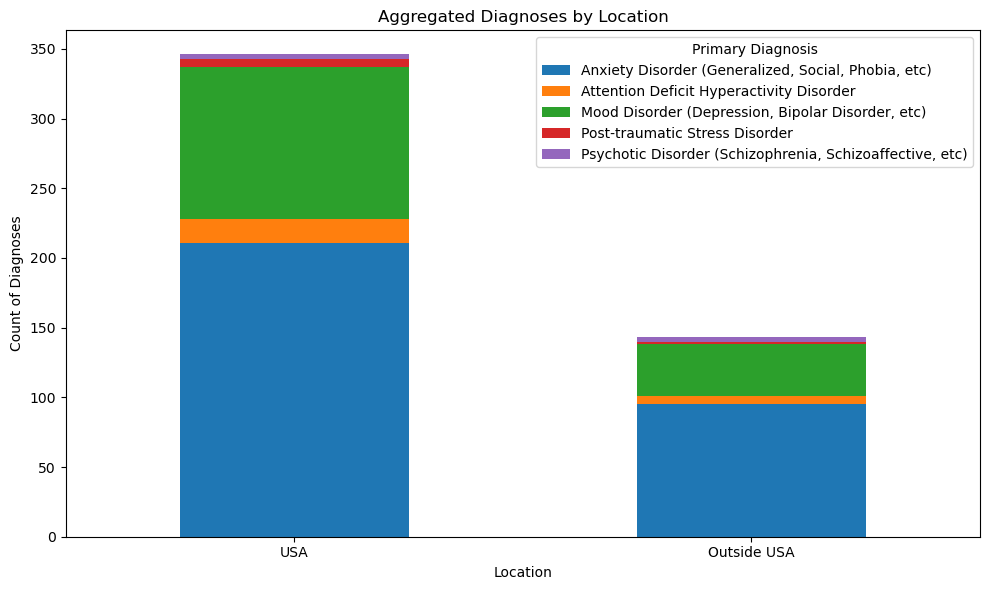

In [22]:
# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'USA': USA_diagnosis_counts,
    'Outside USA': Outside_USA_diagnosis_counts
})

#combined_counts.T
# Transpose the DataFrame to have locations on the x-axis
#swap x and Y locations because locations was showing as legend by default and
#wanted it the other way arount
combined_counts = combined_counts.T


# Plotting Use stacked 
combined_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Aggregated Diagnoses by Location')
plt.xlabel('Location')
plt.ylabel('Count of Diagnoses')
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend(title='Primary Diagnosis')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [23]:
combined_counts

Primary_Diagnosis,"Anxiety Disorder (Generalized, Social, Phobia, etc)",Attention Deficit Hyperactivity Disorder,"Mood Disorder (Depression, Bipolar Disorder, etc)",Post-traumatic Stress Disorder,"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)"
USA,211,17,109,6,3
Outside USA,95,6,37,2,3
